In [10]:
import sys
sys.path.append('../')
from utils import utils
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt


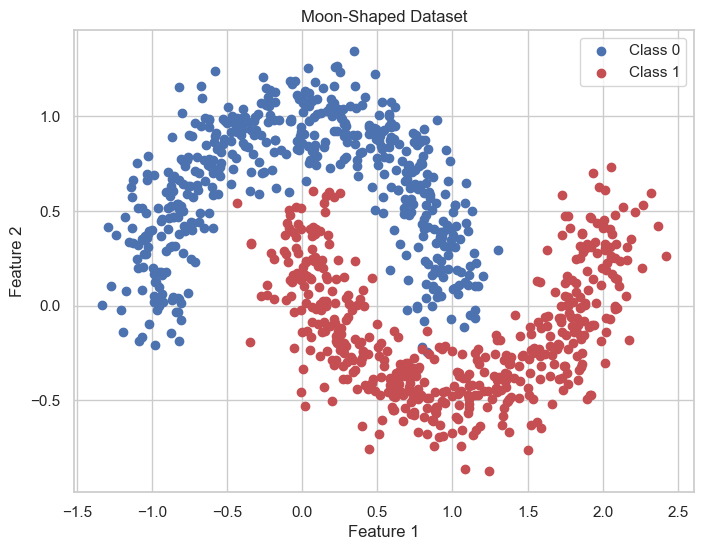

In [11]:
## get data

# Create a moon-shaped dataset with 1000 samples
X, y = utils.make_moons(n_samples=1000, noise=0.15, random_state=42)

# X contains the data points, and y contains their corresponding labels (0 or 1)
utils.plot_moons(X, y)

#### Single Gaussian

The best estimated gaussian is the one with the mean and covariance of the intial data. No need for EM.

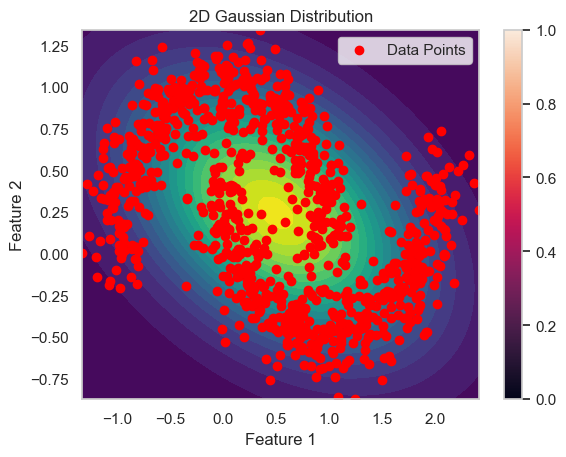

In [12]:
mean_x = np.mean(X[:, 0])
mean_y = np.mean(X[:, 1])
cov_matrix = np.cov(X, rowvar=False)  # rowvar=False ensures data columns represent dimensions

gaussian = multivariate_normal(mean=[mean_x, mean_y], cov=cov_matrix)
# Generate a grid of points for the contour plot
x, y = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                   np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
grid = np.dstack((x, y))

# Evaluate the Gaussian PDF at each point in the grid
pdf_values = gaussian.pdf(grid)

# Create a contour plot
plt.contourf(x, y, pdf_values, levels=20, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], color='red', marker='o', label='Data Points')

# Set labels and a legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('2D Gaussian Distribution')
plt.legend()

# Show the plot
plt.colorbar()
plt.show()

### Gaussian Mixture Model

In [13]:
n_components = 6  # Number of Gaussian components

In [14]:
estimated_data, _, _, _ = utils.train_GMM(X,n_components=n_components)

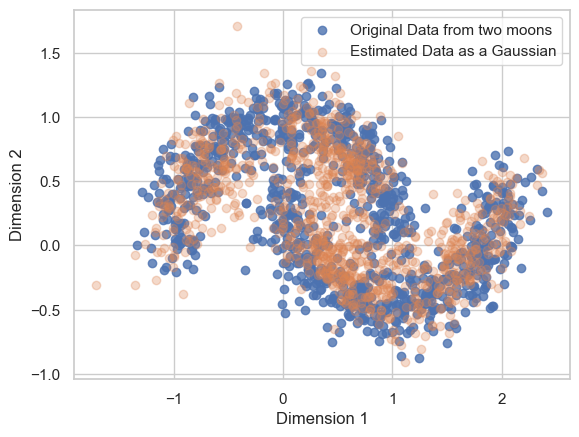

In [15]:
utils.plot_estimated_real_two_moons(X,estimated_data)

In [16]:
## MMD between real and estimated data
import torch
import matplotlib as plt

print(X.shape,estimated_data.shape)

result = utils.MMD(torch.tensor(X), torch.tensor(estimated_data), kernel="inverse_multi_quadratic")

print(f"MMD result of X and Y is {result.item()}")

(1000, 2) (1000, 2)
MMD result of X and Y is 0.013020388782024384


#### Influence of the number of components in the GMM

In [17]:
MMD_inverse_kernel = []
MMD_inverse_kernel_iterations = []

MAX_NO_COMPONENTs = 100
MAX_NO_ITERATIONS = 1000

for n_components in range(1,MAX_NO_COMPONENTs,3):
    estimated_data, _, _, _ = utils.train_GMM(X,n_components=n_components,max_iterations=100)
    result = utils.MMD(torch.tensor(X), torch.tensor(estimated_data), kernel="inverse_multi_quadratic")
    MMD_inverse_kernel += [(n_components,result.item())]


for max_iterations in range(50,MAX_NO_ITERATIONS,100):
    estimated_data, _, _, _ = utils.train_GMM(X,n_components=5,max_iterations=max_iterations)
    result = utils.MMD(torch.tensor(X), torch.tensor(estimated_data), kernel="inverse_multi_quadratic")
    MMD_inverse_kernel_iterations += [(max_iterations,result.item())]


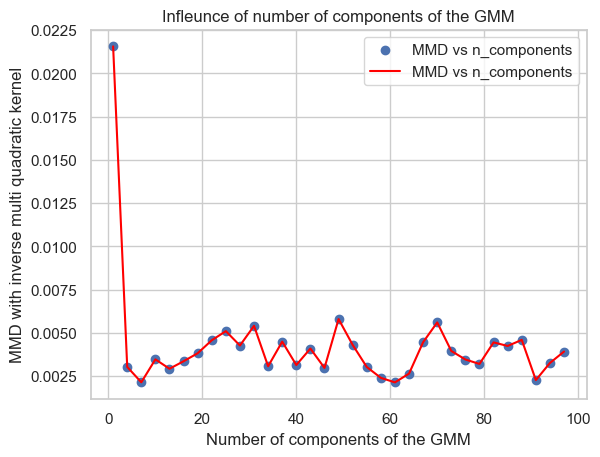

In [19]:
# Create a scatter plot
import matplotlib.pyplot as plt
plt.scatter([x[0] for x in MMD_inverse_kernel], [x[1] for x in MMD_inverse_kernel], label="MMD vs n_components")
plt.plot([x[0] for x in MMD_inverse_kernel], [x[1] for x in MMD_inverse_kernel], label="MMD vs n_components",color='red')

# Add labels and a legend
plt.xlabel("Number of components of the GMM")
plt.ylabel("MMD with inverse multi quadratic kernel")
plt.legend()

# Display the plot
plt.title('Infleunce of number of components of the GMM')
plt.show()

Conclusion: increasing the number of components brings an important improvement just when increasing from 1 to more components, as they offer more expressive power, after that there is no more improvement in reproducing the original data

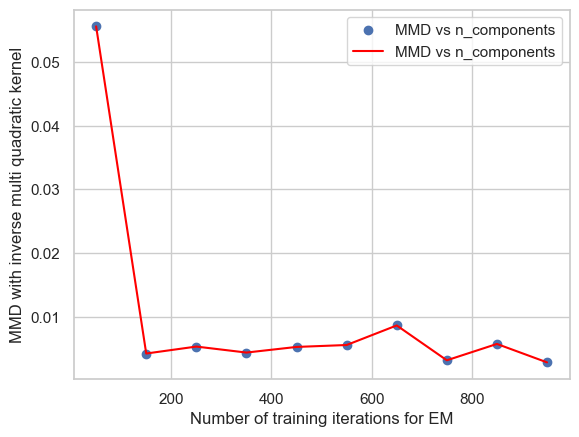

In [ ]:
# Create a scatter plot
plt.scatter([x[0] for x in MMD_inverse_kernel_iterations], [x[1] for x in MMD_inverse_kernel_iterations], label="MMD vs n_components")
plt.plot([x[0] for x in MMD_inverse_kernel_iterations], [x[1] for x in MMD_inverse_kernel_iterations], label="MMD vs n_components",color='red')

# Add labels and a legend
plt.xlabel("Number of training iterations for EM")
plt.ylabel("MMD with inverse multi quadratic kernel")
plt.legend()

# Display the plot
plt.show()

Increasing the number of training iterations for the EM algorithm does not create a massive boost in performance after the first increase (100 to 200)